In [1]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmath
import math

In [2]:
import cppyy
import cppyy.ll
cppyy.add_include_path("jupyter/header/")
cppyy.include("polynomial.h")
cppyy.include("bernstein.h")
from cppyy.gbl import eliastocco
from cppyy.gbl.eliastocco import polynomial
from cppyy.gbl.std import vector,pair,array

## Bernstein polynomial basis

In [3]:
N_bernstein=7
bernstein=eliastocco.polynomial.bernstein_basis['double',1](N_bernstein)
N=bernstein.size()

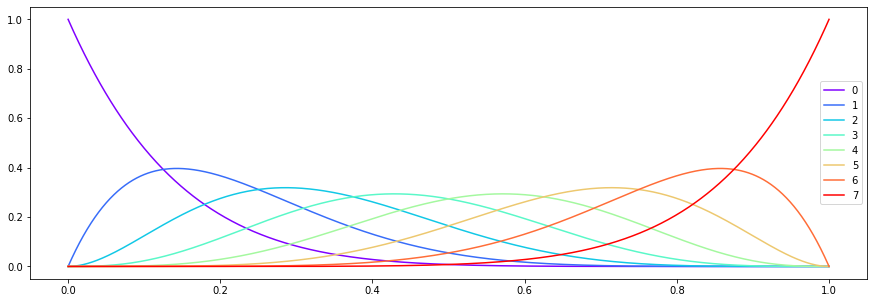

In [7]:
N_x=1000
x  =np.linspace(0,1,N_x)
y  =np.zeros(N_x,dtype=float)
partition=np.zeros(N_x,dtype=float)

plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

for j in range(0,N):
    p=eliastocco.polynomial.polynomial['double'](bernstein)
    p.set(j,1)
    y=p(vector['double'](x))
    #for i in range(0,N_x):        
    #    y[i]=bernstein[j](x[i])
    
    partition+=y
    plt.plot(x, y , color= next(colors),label=str(j))

plt.legend()
plt.show()

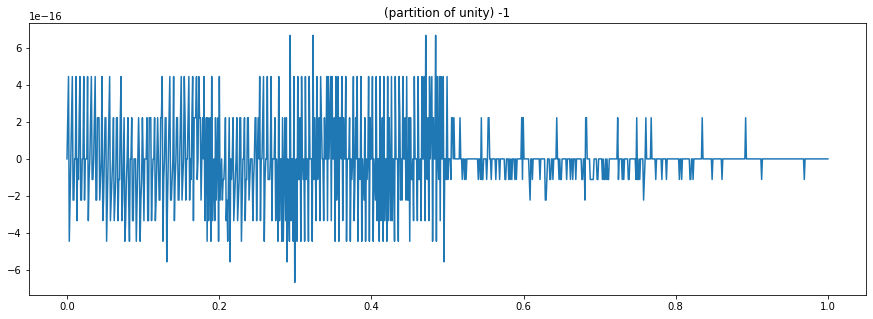

In [8]:
plt.figure ( 1 , figsize = ( 15 , 5 ) )
plt.plot(x, partition-1 )
plt.title("(partition of unity) -1")
plt.show()

## Bernstein polynomial associated to a function

In [9]:
def function (x):
    return np.cos(2*np.pi*x)

In [10]:
N_x=1000
x =np.linspace(0,1,N_x)

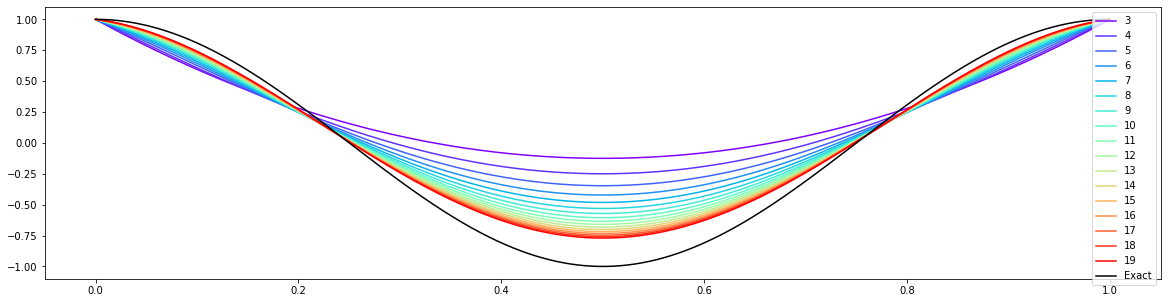

In [12]:
N_tot=20

plt.figure ( 0 , figsize = ( 20 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N_tot-3)))

for N_bernstein in range(3,N_tot):
    
    #definisco la base polinomiale
    bernstein=eliastocco.polynomial.bernstein_basis['double'](N_bernstein)
    N=bernstein.size()
    
    #genero il polinomio associato alla funzione da approssimare
    bernstein_pol=eliastocco.polynomial.associated_bernstein_polynomial['double'](function,bernstein)
    #bernstein_pol=eliastocco.polynomial['double'](coeff,bernstein)
    
    #calcolo la funzione esatta e il polinomio di Bernstein associato in [0,1]
    
    #automatic conversion from numpy array to std::vector<double>
    y=bernstein_pol(vector['double'](x))
    #automatic conversion from std::vector<double> to numpy array
    bern=np.array(y)    
    
    plt.plot(x, bern, color= next(colors),label=str(N_bernstein))
    
    
exact=function(x)
plt.plot(x, exact , color="black",label="Exact" )
plt.legend()
plt.show()

## Bernstein polynomial basis in 2D

In [13]:
N_bernstein_2D_x=3
N_bernstein_2D_y=3
init = array['unsigned int',2]()
init[0]=N_bernstein_2D_x
init[1]=N_bernstein_2D_y
bernstein_2D=eliastocco.polynomial.bernstein_basis['double',2](init)
N=bernstein_2D.size()

In [14]:
bernstein_2D.size()

16

In [15]:
N_x=100
N_y=100
x = np.linspace(0, 1, N_x)
y = np.linspace(0, 1, N_y)

X, Y = np.meshgrid(x, y)

Y_vect=Y.ravel()
X_vect=X.ravel()

XY = vector[array['double',2]](N_x*N_y)

In [16]:
for i in range(0,len(XY)):
    XY[i][0]=X_vect[i]
    XY[i][1]=Y_vect[i]    

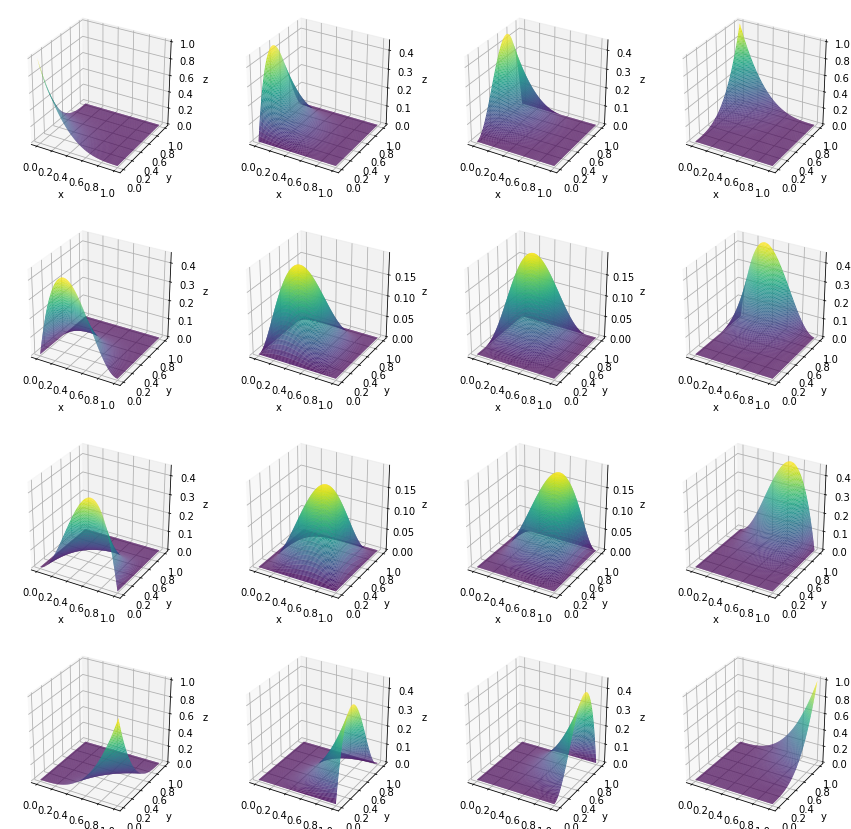

In [17]:
fig = plt.figure(figsize = ( 15 , 15 ))

index = array['unsigned int',2]()
k=1
for index_x in range(N_bernstein_2D_x+1):
    for index_y in range(N_bernstein_2D_y+1): 
        
        index[0]=index_x
        index[1]=index_y
        
        coeff=cppyy.gbl.std.make_pair(index,1)
        bernstein = eliastocco.polynomial.polynomial['double',2]([coeff],bernstein_2D)
               
        Z_stl=bernstein(XY)
        Z_array=np.array(Z_stl)
        
        Z=Z_array.reshape(N_x,N_y)
        
        ax = fig.add_subplot(N_bernstein_2D_x+1, N_bernstein_2D_y+1, k, projection='3d')
        k=k+1
        
        ax.plot_surface(X, Y, Z, cmap='viridis',rstride=1, cstride=1)

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z');
        
plt.show()